<h1>Boston Housing Data Project</h1>
<p>IBM Statistics for Data Science with Python Final Project<p>
<small>By Matthew Seaman</small>

<h2>Project Description</h2>
<p>This project simulates working as a data scientist at a housing agency in Boston, Massachusettes. The agency's upper management wishes to obtain answers to the following questions:</p>
<ul>
    <li>Is there a significant difference in the median value of houses bounded by the Charles river, or not?</li>
    <li>Is there a difference in the median values for houses of each proportion of owner-occupied units constructed prior to 1940?</li>
    <li>Is there a relationship between nitric oxide concentrations found within a town and the proportion of non-retail business acres per town?</li>
    <li>What is the impact of an additional weighted distance to the five major Boston employment centers on the median value of owner-occupied homes?</li>
</ul>
<p>The data set that will be used to provide answers to these questions comes from data collected by the US Census Service.</p>
<p>Our first step in analyzing this data will be to load it into a pandas dataframe.</p>

<h2>Tasks 1 and 3</h2>
<small>Task 2 of this project has been ommitted from this notebook because the content of that task was for creating or logging into IMB Watson Studio to create a project and a Jupyter Notebook.</small>

In [1]:
#import required python libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
#access dataset and load it into a dataframe
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

#display the first 8 rows of the dataframe
boston_df.head(8)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1


In [3]:
#examine the dataframe's shape
boston_df.shape

(506, 14)

<p>We can see from the dataframe above and the values returned by .shape that the data set contains 506 rows and 14 columns. The columns are give us all of the different variables that are included in this data set:</p>
<ul>
    <li>CRIM - per capita crime rate by town</li>
    <li>ZN - proportion of residential land zoned for lots over 25,000 sq.ft.</li>
    <li>INDUS - proportion of non-retail business acres per town.</li>
    <li>CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)</li>
    <li>NOX - nitric oxides concentration (parts per 10 million)</li>
    <li>RM - average number of rooms per dwelling</li>
    <li>AGE - proportion of owner-occupied units built prior to 1940</li>
    <li>DIS - weighted distances to five Boston employment centres</li>
    <li>RAD - index of accessibility to radial highways</li>
    <li>TAX - full-value property-tax rate per 10,000 dollars</li>
    <li>PTRATIO - pupil-teacher ratio by town</li>
    <li>LSTAT - percent lower status of the population</li>
    <li>MEDV - Median value of owner-occupied homes in 1000's of dollars</li>
</ul>
<p>The next thing we will do is clean the dataframe up, check the data types for each of the variables contained within the dataframe, and check to see if there are any missing values.</p>

In [4]:
#drop unneccessary columns
boston_df.drop('Unnamed: 0', axis=1, inplace=True)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [5]:
#reset index
boston_df.reset_index()

#check for missing values
boston_df.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
#check data types for dataframe
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object

<p>Now we that we have dropped unnecessary rows from the dataframe, determined that there are no missing values, and confirmed that all datatypes are correct. We can proceed with analyzing the dataset to answer the initial questions posed above.</p>

<h2>Task 4</h2>

<p>Before we begin answering the main questions, the project calls for five specific visualizations: 2 boxplots, 2 histograms, and a scatterplot displaying various features in the dataset. These visualizations are as follows:</p>
<ul>
    <li>A boxplot for the median value of owner-occupied homes.</li>
    <li>A boxplot for the MEDV variable vs the AGE variable (with additional requirements for the age variable).</li>
    <li>A histogram for the Charles river variable.</li>
    <li>A histogram for the pupil to teacher ratio variable.</li>
    <li>A scatterplot depicting the relationship between nitric oxide levels and the proportion of non-retail business acrage per town.</li>
</ul>

<p>We will first generate a boxplot for the median value of owner-occupied homes (MEDV) variable. The seaborn module will be used to generate the visualization.</p>

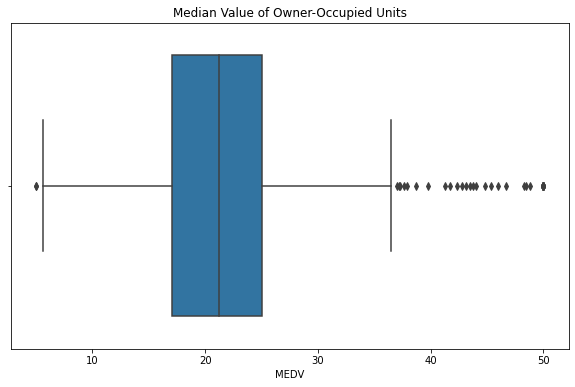

In [7]:
#create a boxplot for MEDV variable
plt.figure(figsize=(10,6))
ax = sns.boxplot(x = boston_df.MEDV)
ax.set_title('Median Value of Owner-Occupied Units')
plt.show()

<p>The boxplot immediately shows us something interesting about the MEDV variable: there is a large number of outliers sitting beyond the maximum value displayed in the boxplot. It is hard to get precise numbers from the box plot, so lets use the .describe() function to help explore this variable.</p>

In [8]:
boston_df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

<p>MEDV is measured in thousands of dollars, so a one is actually one-thousand; a two is in fact two-thousand; and so on. Here we can see that the minimum value in the column is five (five-thousand), the maximum is fifty, the first quartile is seventeen, the median is twenty-one, and the third quartile is twenty-five. We can also see that the mean is twenty-two and the standard deviation is about nine.</p>

<p>We will now generate a second boxplot using the MEDV variable, but this time we will compare it with the AGE variable. However, we will not use the AGE variable as it is in the dataframe right now. We will divide the AGE values in to three bins: 35 years and younger, between 35 and 70 years, and 70 years and older. Remember that the AGE variable describes the proportion of structures built prior to the 1940s.</p>

In [9]:
#divide AGE into three bins
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'


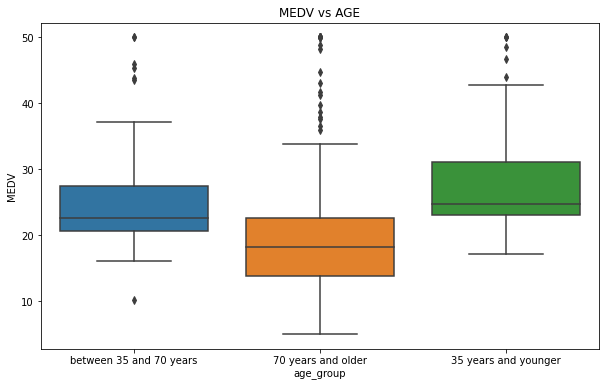

In [10]:
#create a histogram displaying MEDV vs AGE using the new age bins
plt.figure(figsize=(10,6))
ax = sns.boxplot(x = boston_df.age_group, y = boston_df.MEDV)
ax.set_title('MEDV vs AGE')
plt.show()

<p>This boxplot is especially interesting given that one of our primary questions posed at the beginning of this project is about whether there is a difference in MEDV in relation to AGE. Based on this boxplot, there appears to be an encouraging sign that yes, there is indeed such a difference to be observed. AGE appears to be a possible predictor of MEDV based on the relative positions of each of the three box plots. If AGE was not a possible predictor, we would expect to see all three of the box plots being level with each other; however, we can see that they are in fact staggared a bit. This suggests that there is a difference in median value for owner-occupied homes based on the proportion of structures buit prior to the 1940s. We should again note the large number of outliers sitting above the maximum values of each boxplot.</p>

<p>Our next visualization is a histogram displaying the data found within the CHAS variable. This is a dummy variable that observes whether a property is bound by the river or not, so what we are looking to do is display the frequencies for two categories: bound by the river and not bound by the river. If the property is bound by the river, then the CHAS value recorded for that property is 1, and 0 if not bound by the river.</p>

Text(0, 0.5, 'Number of Properties')

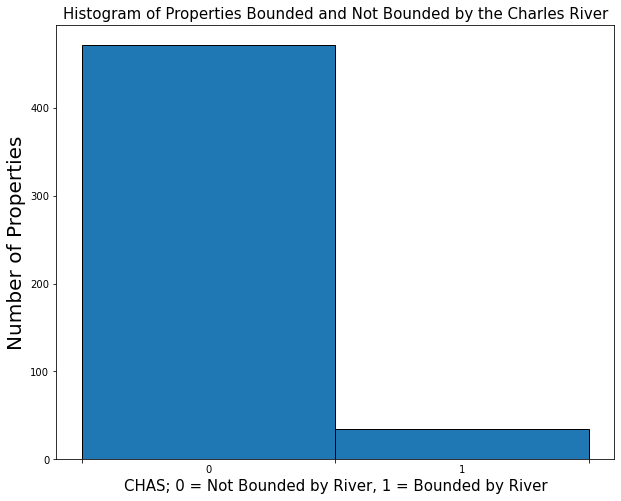

In [11]:
#create a histogram of the CHAS variable
#import a new part of matplotlib
import matplotlib.ticker as tkr

#set bins
hist_bins = range(3)

#create figure and build histogram
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.hist(boston_df['CHAS'], bins=hist_bins, edgecolor='black')

#format the x axis and x tick locations
ax.set_xticks(hist_bins)
ax.xaxis.set_minor_locator(tkr.AutoMinorLocator(n=2))
ax.xaxis.set_minor_formatter(tkr.FixedFormatter(hist_bins))
ax.xaxis.set_major_formatter(tkr.NullFormatter())

for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    
#set titles and labels
ax.set_title('Histogram of Properties Bounded and Not Bounded by the Charles River', fontsize=15)
ax.set_xlabel('CHAS; 0 = Not Bounded by River, 1 = Bounded by River', fontsize=15)
ax.set_ylabel('Number of Properties', fontsize=20)



<p>We can see from the histogram above that the vast majority of properties are not bounded by the Charles river. In fact, less than 100 properties are along the river. This is something that we can count in order to get exact numbers.</p>

In [12]:
boston_df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

<p>We can see that only 35 properties actually sit along the Charles river, while the other 471 properties in our data set do not sit along the river.</p>

<p>The next visualization that we will make will be another histogram, displaying the teacher-student ratio (PTRATIO).</p>

Text(0, 0.5, 'Number of Towns')

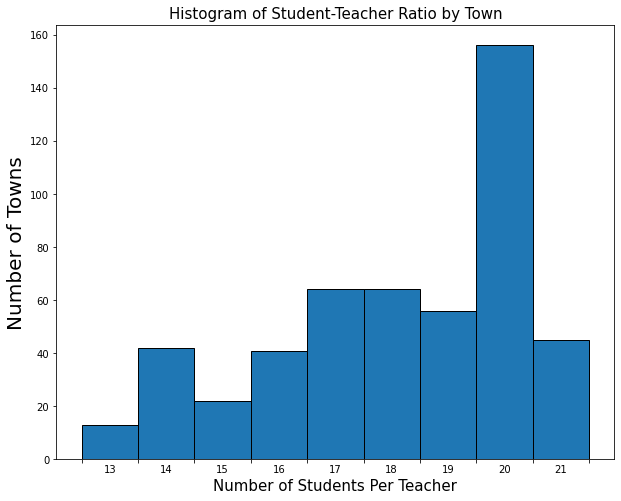

In [13]:
#create a histogram of the PTRATIO variable
#import a new part of matplotlib
import matplotlib.ticker as tkr

#set bins
hist_bins = np.arange(round(boston_df['PTRATIO'].min()), round(boston_df['PTRATIO'].max()) + 1, 1)

#create figure and build histogram
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.hist(boston_df['PTRATIO'], bins=hist_bins, edgecolor='black')

#format the x axis and x tick locations
ax.set_xticks(hist_bins)
ax.xaxis.set_minor_locator(tkr.AutoMinorLocator(n=2))
ax.xaxis.set_minor_formatter(tkr.FixedFormatter(hist_bins))
ax.xaxis.set_major_formatter(tkr.NullFormatter())

for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    
#set titles and labels
ax.set_title('Histogram of Student-Teacher Ratio by Town', fontsize=15)
ax.set_xlabel('Number of Students Per Teacher', fontsize=15)
ax.set_ylabel('Number of Towns', fontsize=20)

<p>In order to produce this histogram, the minimum and maximum values found within the PTRATIO column were selected and then rounded to the nearest whole integer. Then, they were passed into a numpy's arange function, and used to generage the bins and x ticks for this histogram.</p>
<p>This histogram displays the student-teacher ratio by town. Based on the histogram, a student-teacher ratio of about 20 is the most common, being present in about 160 towns.</p>

<p>The final descriptive visualization that we will make before proceeding to more in-depth data analysis is a scatter plot showing the relationship between nitric oxide levels and the proportion of non-retail business acreage per town.</p>

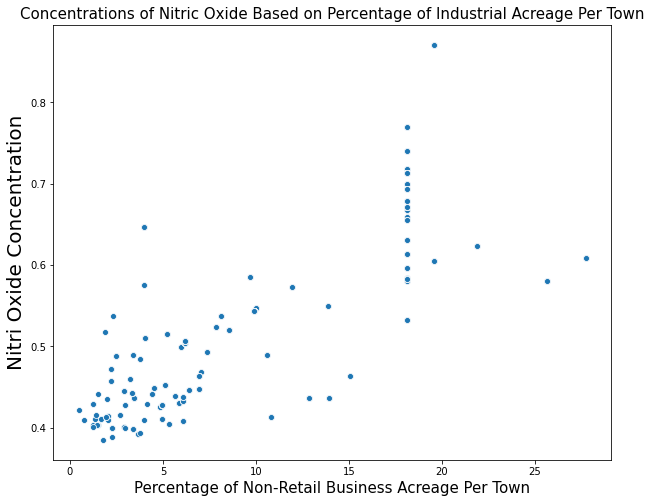

In [14]:
#create scatter plot
plt.figure(figsize=(10,8))
sns.scatterplot(boston_df['INDUS'], boston_df['NOX'])
plt.title('Concentrations of Nitric Oxide Based on Percentage of Industrial Acreage Per Town', fontsize=15)
plt.ylabel('Nitri Oxide Concentration', fontsize=20)
plt.xlabel('Percentage of Non-Retail Business Acreage Per Town', fontsize=15)
plt.show()

<p>What this scatter plot makes readily apparent is that there is a visible and positive relationship between the levels of Nitric oxide and the amount of Industrial acreage present in a given town. This is demonstrated by the upward sloping curve of the data points shown above.</p>

<h2>Task 5</h2>

<p>In this part of the project, we will proceed with developing answers for the four questions that we stated at the beginning of the project. These questions were:</p>
<ul>
    <li>Is there a significant difference in the median value of houses bounded by the Charles river, or not?</li>
    <li>Is there a difference in the median values for houses of each proportion of owner-occupied units constructed prior to 1940?</li>
    <li>Is there a relationship between nitric oxide concentrations found within a town and the proportion of non-retail business acres per town?</li>
    <li>What is the impact of an additional weighted distance to the five major Boston employment centers on the median value of owner-occupied homes?</li>
</ul>
<p>In order to answer these four questions, we will perform a T-test, an ANOVA test, a Pearson Correlation, and a Regression Analysis respectively. For each of the four tests, we will set the alpha value to 0.05.</p>

<h3>Test 1</h3>
<p>Is there a significant difference in the median value of houses bounded by the Charles river, or not?</p>
<p>In this case, our dependent variable is the median value of houses and our independent variable is being bounded by the Charles river.</p>
<p>Our Hypotheses are:</p>
<ul>
    <li>H0: There is no significant difference in the median value of homes based on whether they are bounded by the Charles river.</li>
    <li>H1: There is a siginficant difference in the median values of homes based on whether they are bounded by the Charles river.</li>
</ul>
<p>Where H0 is our null hypothesis and H1 is our alternative hypothesis. We will perform a T-test to answer this question and if the T-test results in a P-value less than 0.05, we will reject the null hypothesis and conclude that the alternative hypothesis is true. However, if the T-test returns a P-value greater than 0.05, we will not reject the null hypothesis and conclude that the null hypothesis is in fact true.</p>
<p>There are a couple steps that we have to take first in order to set up the T-test. We are working with a continuous variable and a categorical variable containing two classes. We will need to select these two classes individually. We then have to perform a Levene's test to determine whether the variance of the two groups are equal or not. The results of the Levene's test will then be entered into the T-test as an argument.</p>

In [15]:
#select data for the Levene test and T-test
bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
notbounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

In [16]:
#perform levene test
stats.levene(bounded, notbounded, center='mean')

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

<p>The Levene test returned a p-value of less than 0.05 and this is very important. In regards to the Levene test, this test asks its own question: is there equality of variance or not? This question is posed as its own set of hypotheses: H0 = the variances are equal, and H1: the variances are not equal; and the alpha value is again set at 0.05. Since the p-value returned by the Levene test was 0.003, which is less than 0.05, we reject the null hypothesis and conclude that the variances are in fact different. This is important because we will pass this result as an argument into our T-test.</p>

In [17]:
#perform T-test
stats.ttest_ind(bounded, notbounded, equal_var=False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

<p>The equal_var parameter represents the results of the Levene test and its value is set to False because we found that the variances are not equal as a result of our Levene test.</p>
<p>The results of our T-test have also returned a p-value of less than 0.05 at a value of 0.003. This means we will reject our null hypothesis and conclude that there is a significant difference in the median value of homes based on whether or not they are bounded by the Charles river.</p>
<p>This therefore answers our first question.</p>

<h3>Test 2</h3>
<p>Is there a difference in the median values for houses of each proportion of owner-occupied units constructed prior to 1940?</p>
<p>Our hypotheses for this question are as follows:</p>
<ul>
    <li>H0: There is no difference in the median values for houses based on whether the structures were built prior to 1940.</li>
    <li>H1: There is a difference in the median values for houses based on whether the structures were built prior to 1940.</li>
</ul>
<p>To answer this question, we are going to use the median value for homes as well as the three age categories that we made eariler when we plotted the boxplot depicting the relationship between the MEDV and AGE variables. The boxplot that we generated above indicated the existence of a relationship between the two variables, now were are going actually test out that hypothesis. To do this, we will use an ANOVA test. Our alph value is once again set at 0.05 and if the ANOVA test returns a p-value of less than 0.05, we will be able to reject our null hypothesis and conclude that yes, we have demonstrated the existence of the relationship we appear to have observed in our boxplots.</p>

In [18]:
#set up ANOVA test data
thirtyfive_younger = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

<p>Before conducting the ANOVA test, we will again check to make sure that the variances are equal. To do this, we will again use the Levene test. Remember that the Levene test has as its null hypothesis that the variances are equal; and its alternative hypothesis is that the variances are unequal. If we get a p-value of less than 0.05 as a result of the Levene test, we will know that our variances are unequal and we will have to do additional work before we can carry out an ANOVA test.</p>

In [19]:
#run levene test to check for equal variance
stats.levene(thirtyfive_younger, thirtyfive_seventy, seventy_older, center='mean')

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

<p>The p-value returned by the Levene test was 0.06, which is larger than 0.05; so our null hypothesis stating that the variances are equal still holds. This means that we can proceed with the ANOVA test.</p>

In [20]:
#run the ANOVA test
stats.f_oneway(thirtyfive_younger, thirtyfive_seventy, seventy_older)


F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

<p>The ANOVA test returned a p-value of 1.7e-15, which is much smaller than our alpha value of 0.05. Therefore, we can reject our null hypothesis and conclude that there is a difference in the median values of houses based on whether the structure was built prior to the 1940s. This therefore answers our second question.</p>

<h3>Test 3</h3>
<p>Is there a relationship between nitric oxide concentrations found within a town and the proportion of non-retail business acres per town?</p>
<p>Our hypotheses for this question are:</p>
<ul>
    <li>H0: There is no relationship between the levels of Nitric oxide and the percentage of non-retail business acreage in a town.</li>
    <li>H1: There is a relationship between the levels of Nitric oxide and the percentage of non-retail business acreage in a town.</li>
</ul>
<p>This is a question that we have also already begun to explore when we created the scatter plot depicting the NOX and INDUS variables earlier in this project. Remember that the results of our scatter plot showed a visible upward sloping curve, indicating a positive relationship between Nitric oxide levels and the percentage of industrial acreage in a town. We will now carry out a test to see if this is indeed the case. Since we are working with two continuous variables, we will use a Pearson Correlation to test our hypotheses. Once again, our alpha value has been set to 0.05.</p>

In [21]:
#run the pearson correlation test
stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

<p>The results of the Pearson Correlation test confirm our earlier observations. With the p-value being 7.9e-98, this is considerable smaller than our alpha value of 0.05; therefore, we reject our null hypothesis and conclude that there is indeed a relationship between Nitric oxide levels and the percentage of industrial acreage in a town.</p>
<p>This therefore answers our third question.</p>

<h3>Test 4</h3>
<p>What is the impact of an additional weighted distance to the five major Boston employment centers on the median value of owner-occupied homes?</p>
<p>This question is slightly different from the ones that we have been answering up until this point. Instead of asking if a realtionship exists between two variables, we are asking about how much one variable impacts another variable. Therefore, we are looking for a correlation coefficient and that can be obtained by running a regression analysis.</p>
<p>For this test, we will be using the MEDV and DIS variables. Remember that the DIS variable describes the weighted distances to five Boston employment centers. And we are looking to see how the median values of properties change in response to changes in the weighted distance. So our dependent variable in this test is MEDV and our independent variable is DIS.</p>

In [22]:
#set up regression analysis
x = boston_df['DIS']
y = boston_df['MEDV']

#add  constant
x = sm.add_constant(x)

#create model and fit
model = sm.OLS(y, x).fit()

#display model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 26 Dec 2020   Prob (F-statistic):           1.21e-08
Time:                        17:16:47   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<p>Based on the summary table for the regression analysis, we can see several peices of information that are interesting. First, the p-value is 1.21e-08, which is smaller than 0.05, the alpha value that we have been using; therefore, the regressional analysis has demonstrated to us that there is in fact a relationship between the MEDV and DIS variables. However, what is more important for the question at hand is that the regression analysis has revealed to us the extent to which an increase in DIS affects MEDV: 1.0916. So for every unit added to DIS, in other words when the weighted distance increases by one unit, the median value of properties also increases by 1.0916. This tells us that the further away you are from the five Boston employment centers, the higher the median value is for owner-occupied homes.</p>
<p>This therefore answers our fourth and final question in this project.</p>

<h2>Summary</h2>
<p>In this project we used data collected by the US Census Service to answer four questions for a housing agency in Boston:</p>
<ul>
    <li>Is there a significant difference in the median value of houses bounded by the Charles river, or not?</li>
    <li>Is there a difference in the median values for houses of each proportion of owner-occupied units constructed prior to 1940?</li>
    <li>Is there a relationship between nitric oxide concentrations found within a town and the proportion of non-retail business acres per town?</li>
    <li>What is the impact of an additional weighted distance to the five major Boston employment centers on the median value of owner-occupied homes?</li>
</ul>
<p>After analyzing the dataset we were able to come to the following four conclusions:</p>
<ul>
    <li>There is a significant difference in the median value of homes based on whether or not they are bounded by the Charles river.</li>
    <li>There is a difference in the median values of houses based on whether the structure was built prior to the 1940s.</li>
    <li>There is a positive relationship between Nitric oxide levels and the percentage of industrial acreage in a town.</li>
    <li>For every unit added to the weighted distance, the median value of properties also increases by 1.0916.</li>
</ul>
<p>These results can now be passed onto decision makers within the housing agency.</p>

<small>Note: Task 6 in this project has been ommitted from this notebook because Task 6 pertained to sharing this Notebook.<small>